In [1]:

import tensorflow as tf

import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.tree import export_graphviz
tf.debugging.set_log_device_placement(True)


import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow.compat.v2.feature_column as fc

import re

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.0.0
Num GPUs Available:  2


In [3]:
import matplotlib.pyplot as plt # For making plots

import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras

Using TensorFlow backend.


In [4]:

from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# 7 in v1.10.0

10.0
7.6


In [5]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10199376641381470405, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9054296982409605734
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5", name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4266931127415481484
 physical_device_desc: "device: 1, name: GeForce RTX 2070, pci bus id: 0000:65:00.0, compute capability: 7.5"]

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline


import datetime, os

from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

from sklearn.model_selection import train_test_split

from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout

[SVM], Logistic; random forrest, naive bayes, XGBoost, [DN

In [7]:
data = pd.read_csv('final_project_mod.csv', dtype = {'Continent': 'category', 'Month':'category', 'DayOfWeek':'category'})

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159912 entries, 0 to 159911
Data columns (total 49 columns):
x0           159912 non-null float64
x1           159912 non-null float64
x3           159912 non-null float64
x4           159912 non-null float64
x5           159912 non-null float64
x6           159912 non-null float64
x7           159912 non-null float64
x8           159912 non-null float64
x9           159912 non-null float64
x10          159912 non-null float64
x11          159912 non-null float64
x12          159912 non-null float64
x13          159912 non-null float64
x14          159912 non-null float64
x15          159912 non-null float64
x16          159912 non-null float64
x17          159912 non-null float64
x18          159912 non-null float64
x19          159912 non-null float64
x20          159912 non-null float64
x21          159912 non-null float64
x22          159912 non-null float64
x23          159912 non-null float64
Continent    159912 non-null category


In [10]:
data.isnull().sum()

x0           0
x1           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
Continent    0
x25          0
x26          0
x27          0
x28          0
Month        0
DayOfWeek    0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
Money        0
x39          0
x40          0
x41          0
x42          0
x43          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
y            0
dtype: int64

In [13]:
# The fist step in ordering a category feature is to define a custom order by way of CategoricalDtype
month_ordered_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Next, the attribute needs to be explicitly re_ordered:
cat_dtype = pd.api.types.CategoricalDtype(categories=month_ordered_categories, ordered=True)
data.Month = data.Month.astype(cat_dtype)

# Repeat steps for DayOfWeek
dayofweek_ordered_categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
cat_dtype = pd.api.types.CategoricalDtype(categories=dayofweek_ordered_categories, ordered=True)
data.DayOfWeek = data.DayOfWeek.astype(cat_dtype)

# Repate Steps for Continent
# Ordering based upon population
continent_ordered_categories = ['Asia', 'America', 'Europe']
cat_dtype = pd.api.types.CategoricalDtype(categories=continent_ordered_categories, ordered=True)
data.Continent = data.Continent.astype(cat_dtype)

In [14]:
data.Month.astype("category").cat.codes.unique()

array([ 6,  7,  5,  4,  8,  3, 10,  9,  2,  1, 11,  0], dtype=int64)

In [15]:
data['Month'].dtypes

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 ordered=True)

In [16]:
data.DayOfWeek.astype("category").cat.codes.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [17]:
data['DayOfWeek'].dtypes

CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], ordered=True)

In [18]:
data.Continent.astype("category").cat.codes.unique()

array([2, 0, 1], dtype=int64)

In [19]:
data['Continent'].dtypes

CategoricalDtype(categories=['Asia', 'America', 'Europe'], ordered=True)

In [20]:
data.isnull().sum()

x0           0
x1           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
Continent    0
x25          0
x26          0
x27          0
x28          0
Month        0
DayOfWeek    0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
Money        0
x39          0
x40          0
x41          0
x42          0
x43          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
y            0
dtype: int64

## separte the features from target

In [21]:
x = data.drop(['y'], axis = 1)

In [22]:
y = data['y']

In [23]:
y = y.to_numpy()

In [24]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
##set one-hot for the category features

In [26]:
x[x.select_dtypes('category').columns].nunique().reset_index(name='cardinality')

index  cardinality
0  Continent            3
1      Month           12
2  DayOfWeek            5

In [27]:
#ok, about an extra 20 features will come out.  
#will need to put to an array, and then will need to cocatenate

In [28]:
x1 = pd.get_dummies(x,prefix = ['Continent', 'Month', 'DayOfWeek'])

In [29]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159912 entries, 0 to 159911
Data columns (total 65 columns):
x0                   159912 non-null float64
x1                   159912 non-null float64
x3                   159912 non-null float64
x4                   159912 non-null float64
x5                   159912 non-null float64
x6                   159912 non-null float64
x7                   159912 non-null float64
x8                   159912 non-null float64
x9                   159912 non-null float64
x10                  159912 non-null float64
x11                  159912 non-null float64
x12                  159912 non-null float64
x13                  159912 non-null float64
x14                  159912 non-null float64
x15                  159912 non-null float64
x16                  159912 non-null float64
x17                  159912 non-null float64
x18                  159912 non-null float64
x19                  159912 non-null float64
x20                  159912 non-nu

# scale

In [30]:


scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
from keras.applications import Xception
from keras.utils import multi_gpu_model

In [32]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],
                                          cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

In [37]:
with mirrored_strategy.scope():
    model_final = tf.keras.Sequential()
    model_final.add(layers.Dense(300, input_dim = 65, activation = 'relu'))
    model_final.add(layers.Dropout(0.5))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dropout(0.1))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(1, activation = 'sigmoid'))
    
    model_final.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.01, decay = 0.0001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
    
    log_dir = 'final_logs'
    tb_random = TensorBoard(log_dir=log_dir, histogram_freq=1)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [38]:
with mirrored_strategy.scope():

    x_train, x_test, y_train, y_test = train_test_split(scaled_train_df.values, y, test_size=0.20, random_state=102)

In [39]:
print(x_train.dtype)

float64


In [40]:
with mirrored_strategy.scope():

    history = model_final.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=1000, callbacks=[tb_random])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Te

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = hierarchical_copy, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Executing op __inference_initialize_variables_2708 in device /job:localhost/replica:0/task:0/device:GPU:0
INFO:tens

Epoch 41/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4803 - accuracy: 0.7691 - val_loss: 1.0406 - val_accuracy: 0.4162
Epoch 42/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4823 - accuracy: 0.7654 - val_loss: 1.1992 - val_accuracy: 0.4105
Epoch 43/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4829 - accuracy: 0.7658 - val_loss: 1.0445 - val_accuracy: 0.4123
Epoch 44/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4787 - accuracy: 0.7684 - val_loss: 1.1396 - val_accuracy: 0.4071
Epoch 45/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4812 - accuracy: 0.7677 - val_loss: 1.0550 - val_accuracy: 0.4053
Epoch 46/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4784 - accuracy: 0.7695 - val_loss: 1.1611 - val_accuracy: 0.4063
Epoch 47/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.47

Epoch 95/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4640 - accuracy: 0.7784 - val_loss: 1.2222 - val_accuracy: 0.3976
Epoch 96/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4626 - accuracy: 0.7793 - val_loss: 1.3467 - val_accuracy: 0.3971
Epoch 97/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4642 - accuracy: 0.7776 - val_loss: 1.1622 - val_accuracy: 0.3974
Epoch 98/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4609 - accuracy: 0.7795 - val_loss: 1.3570 - val_accuracy: 0.3974
Epoch 99/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4642 - accuracy: 0.7772 - val_loss: 1.2670 - val_accuracy: 0.3968
Epoch 100/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4616 - accuracy: 0.7792 - val_loss: 1.1864 - val_accuracy: 0.3983
Epoch 101/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.

127929/127929 [==============================] - 1s 7us/sample - loss: 0.4523 - accuracy: 0.7861 - val_loss: 1.0336 - val_accuracy: 0.3974
Epoch 149/200
127929/127929 [==============================] - 1s 8us/sample - loss: 0.4527 - accuracy: 0.7846 - val_loss: 1.1606 - val_accuracy: 0.3973
Epoch 150/200
127929/127929 [==============================] - 1s 8us/sample - loss: 0.4520 - accuracy: 0.7869 - val_loss: 0.9878 - val_accuracy: 0.4007
Epoch 151/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4526 - accuracy: 0.7862 - val_loss: 1.2098 - val_accuracy: 0.3972
Epoch 152/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4530 - accuracy: 0.7849 - val_loss: 0.9921 - val_accuracy: 0.3971
Epoch 153/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4505 - accuracy: 0.7870 - val_loss: 1.0518 - val_accuracy: 0.3971
Epoch 154/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4516 - ac

Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:GPU:0


In [41]:
with mirrored_strategy.scope():
    predictions = model_final.predict(x_test)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MultiDeviceIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Ex

In [42]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(y_test))


Executing op ArgMax in device /job:localhost/replica:0/task:0/device:GPU:0
Prediction: [0 0 0 ... 0 0 0]
   Actuals: [1 1 0 ... 1 0 0]


In [43]:
test_accuracy = tf.keras.metrics.Accuracy()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0


In [44]:
test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignAddVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0
Test set accuracy: 60.348%


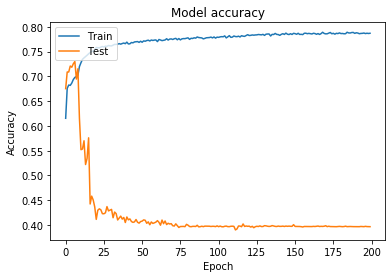

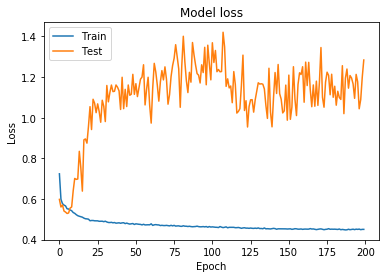

In [45]:
#come back to this; not working right.

import tkinter
import matplotlib


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.savefig("DNgraphacc.png")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.savefig("DNgraphloss.png")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [117]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [118]:
import time

import psutil


In [119]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

In [120]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# PCA

In [103]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [104]:
# use x1 and y

x2 = x1.values

y1 = y



In [105]:
x2 = StandardScaler().fit_transform(x2)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x2, y1, test_size=0.20, random_state=102)

In [109]:
pca = PCA(n_components = 20)

x_trainfit = pca.fit_transform(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_

In [110]:
x_train1 = pd.DataFrame(x_train)

In [111]:
principalDF = pd.DataFrame(data = x_trainfit, columns = x_train1.columns)

In [112]:
finalDf = pd.concat([principalDF, pd.DataFrame(y_train)], axis = 1)

In [113]:
finalDf

0         1         2         3         4         5         6   \
0       1.221907  1.323421 -1.624763 -1.114565 -1.812442 -1.526481  2.524542   
1       0.613712  0.462496 -1.471441 -0.647032  1.355552  1.366524 -0.347920   
2      -0.518704 -0.171195 -0.653026 -1.013200  1.190647 -0.234772  0.142792   
3      -1.110156  1.727620 -0.525721 -1.082442  0.363851  0.152112  0.290478   
4      -3.025111  0.333310  0.600092  1.821784 -1.031026  0.565276 -0.161068   
...          ...       ...       ...       ...       ...       ...       ...   
127924 -1.331922 -0.022322 -2.252045  1.832275  0.931201  0.652939  1.117810   
127925 -0.275454 -1.866799  0.331434 -1.061423 -0.537972 -0.399054 -1.550776   
127926 -1.572170  0.669268 -0.868394  1.693561  2.508387  0.503568 -0.585593   
127927  4.092922 -1.820405  1.713017 -0.910367  0.187723  0.947020  0.451545   
127928 -0.647718  0.194638  0.711326  1.732770 -0.440794 -0.803698  0.094087   

              7         8         9   ...        11        12        13  \
0      -1.438030 -0.883904 -0.125282  ... -0.645878  0.044303 -0.957996   
1      -0.025688  0.753533 -0.022245  ...  1.818155 -1.968643 -0.361404   
2      -1.736241 -0.754664  0.162262  ... -1.653675 -0.238104 -0.758368   
3       0.324266  1.100875 -0.976864  ... -0.025900 -0.980525  0.084346   
4       0.427842  0.941284  1.152144  ...  0.584118  0.172718 -0.282432   
...          ...       ...       ...  ...       ...       ...       ...   
127924  0.235600  0.608773  0.988828  ... -0.276086 -0.391192  0.283621   
127925  0.296760  1.090335 -0.428737  ...  0.052855  0.909523  0.139106   
127926 -1.390841 -0.651975 -2.014868  ... -0.872190 -0.300582  0.481110   
127927  0.367764  1.208525  0.507993  ...  0.535797  0.370728 -0.207847   
127928  0.467559  1.358355  1.932993  ...  0.906534 -0.824217  0.321494   

              14        15        16        17        18        19  0   
0      -0.878710 -0.674187  0.000496  0.967566  1.281992 -0.676401   1  
1       0.695545 -0.544516  0.110021 -1.415909 -0.141631  0.888358   0  
2       1.788088 -0.429908 -0.256429 -0.514442 -0.466792 -1.063029   0  
3       1.426928  1.040179  1.170237 -1.242249 -0.451017 -1.232605   1  
4      -1.048477 -0.236960  0.732544 -0.245949  0.492411 -0.203371   0  
...          ...       ...       ...       ...       ...       ...  ..  
127924  0.329559 -0.269845  0.304388  0.252552 -0.783366 -0.379391   0  
127925 -0.786838  1.146123  0.615843  0.408704 -0.318051  1.661695   1  
127926  1.366737  0.161980  0.473512 -0.245782  0.953442 -0.115982   1  
127927 -0.451069  0.266612 -1.107410 -0.297117  0.693327 -0.534678   0  
127928  0.426524  0.905680  0.032901  0.003971  0.585788 -1.074809   0  

[127929 rows x 21 columns]

In [114]:
selected = pd.DataFrame(explained_variance)

In [115]:
print(selected)

           0
0   0.119475
1   0.097305
2   0.069350
3   0.060485
4   0.058941
5   0.057879
6   0.050648
7   0.046544
8   0.042828
9   0.041092
10  0.039507
11  0.037014
12  0.035763
13  0.035524
14  0.034935
15  0.034660
16  0.034625
17  0.034605
18  0.034492
19  0.034328


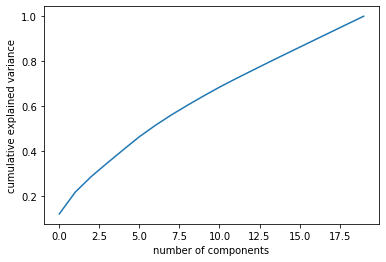

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Pass Through PCA into SVM GridSearch

In [121]:
def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10,20,50]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid,n_jobs = 12)
    with parallel_backend('threading'):
    #would need to add back in ,cv = nfolds after param_grid
        grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(x_train,y_train)

In [ ]:
clf1 = SVC(kernel='linear', C=1,gamma = 0.01).fit(x_train, y_train)
clf1.score(x_test, y_test)  
y_pred = clf1.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

# Other Feature Selection Runs

In [69]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(scaled_train_df, y1)

In [72]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(scaled_train_df)
# Summarize selected features
print(features[0:5,:])

[8.539e-03 4.188e-02 1.048e-02 1.680e-03 3.995e-03 1.008e+01 5.741e-01
 1.673e-01 4.167e-02 5.239e-02 2.019e-03 4.626e+01 1.773e-02 5.913e-03
 1.036e-02 6.076e-02 6.497e-02 2.931e-02 1.131e-02 2.145e+02 3.448e-02
 1.172e-04 2.366e+02 1.022e-02 1.732e-02 5.326e-02 3.333e-03 7.381e-03
 1.167e-01 1.222e-02 9.781e-02 1.860e-02 6.116e-03 9.864e+00 2.359e-02
 1.464e+02 5.192e+01 4.926e+01 3.456e-04 7.259e-05 3.410e-02 5.325e+00
 1.279e-04 4.730e-02 2.067e+02 2.821e+01 3.964e+02 2.547e+01 1.726e-01
 1.400e-01 1.608e-01 6.382e-01 1.010e+00 2.256e-02 7.031e-01 1.744e-02
 9.773e-02 7.829e-01 1.552e+00 5.683e-01 5.359e-03 1.902e-01 7.804e-01
 1.227e+00 5.066e-01]
[[0.455 0.561 0.435 0.   ]
 [0.383 0.617 0.622 0.   ]
 [0.521 0.49  0.437 0.   ]
 [0.525 0.441 0.438 0.   ]
 [0.324 0.405 0.614 0.   ]]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(scaled_train_df, y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(scaled_train_df, y1)

In [ ]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [ ]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))